# Machine Learning Project  
**Author:** Brian Weloba - 14574430  

**Dataset:** AIDS Virus Infection Prediction  

## Preprocessing  

Import required packages:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.svm import SVC

Import the dataset:

In [2]:
df_aids = pd.read_csv('AIDS_Classification.csv')

Inspect the dataframe object:

In [3]:
df_aids.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2139 entries, 0 to 2138
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   time      2139 non-null   int64  
 1   trt       2139 non-null   int64  
 2   age       2139 non-null   int64  
 3   wtkg      2139 non-null   float64
 4   hemo      2139 non-null   int64  
 5   homo      2139 non-null   int64  
 6   drugs     2139 non-null   int64  
 7   karnof    2139 non-null   int64  
 8   oprior    2139 non-null   int64  
 9   z30       2139 non-null   int64  
 10  preanti   2139 non-null   int64  
 11  race      2139 non-null   int64  
 12  gender    2139 non-null   int64  
 13  str2      2139 non-null   int64  
 14  strat     2139 non-null   int64  
 15  symptom   2139 non-null   int64  
 16  treat     2139 non-null   int64  
 17  offtrt    2139 non-null   int64  
 18  cd40      2139 non-null   int64  
 19  cd420     2139 non-null   int64  
 20  cd80      2139 non-null   int6

Check for null values:

In [4]:
pd.DataFrame(df_aids.isna().sum()).T.style.background_gradient(cmap="coolwarm")

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,preanti,race,gender,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
df_aids.describe(percentiles=[0, .25, .30, .50, .75, .80, 1]).T.style.background_gradient(cmap = "coolwarm")

,count,mean,std,min,0%,25%,30%,50%,75%,80%,100%,max
time,2139.000000,879.098177,292.274324,14.000000,14.000000,727.000000,825.000000,997.000000,1091.000000,1105.000000,1231.000000,1231.000000
trt,2139.000000,1.520804,1.127890,0.000000,0.000000,1.000000,1.000000,2.000000,3.000000,3.000000,3.000000,3.000000
age,2139.000000,35.248247,8.709026,12.000000,12.000000,29.000000,30.000000,34.000000,40.000000,42.000000,70.000000,70.000000
wtkg,2139.000000,75.125311,13.263164,31.000000,31.000000,66.679200,68.200000,74.390400,82.555200,84.809280,159.939360,159.939360
hemo,2139.000000,0.084151,0.277680,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
homo,2139.000000,0.661057,0.473461,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
drugs,2139.000000,0.131370,0.337883,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
karnof,2139.000000,95.446470,5.900985,70.000000,70.000000,90.000000,90.000000,100.000000,100.000000,100.000000,100.000000,100.000000
oprior,2139.000000,0.021973,0.146629,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
z30,2139.000000,0.550257,0.497584,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Define X variables and our target(y):

In [6]:
X = df_aids.drop(['infected'],axis=1)
y = df_aids['infected'].values

Create the training and test sets for the dataset:

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)
print(X_train.shape); print(X_test.shape)

(1497, 22)
(642, 22)


Balance the dataset:

In [8]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 14)

X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

X_train_balanced.shape, y_train_balanced.shape, X_test.shape, y_test.shape
X_train_balanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256 entries, 0 to 2255
Data columns (total 22 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   time     2256 non-null   int64  
 1   trt      2256 non-null   int64  
 2   age      2256 non-null   int64  
 3   wtkg     2256 non-null   float64
 4   hemo     2256 non-null   int64  
 5   homo     2256 non-null   int64  
 6   drugs    2256 non-null   int64  
 7   karnof   2256 non-null   int64  
 8   oprior   2256 non-null   int64  
 9   z30      2256 non-null   int64  
 10  preanti  2256 non-null   int64  
 11  race     2256 non-null   int64  
 12  gender   2256 non-null   int64  
 13  str2     2256 non-null   int64  
 14  strat    2256 non-null   int64  
 15  symptom  2256 non-null   int64  
 16  treat    2256 non-null   int64  
 17  offtrt   2256 non-null   int64  
 18  cd40     2256 non-null   int64  
 19  cd420    2256 non-null   int64  
 20  cd80     2256 non-null   int64  
 21  cd820    2256 

Visualisation before and after balancing:

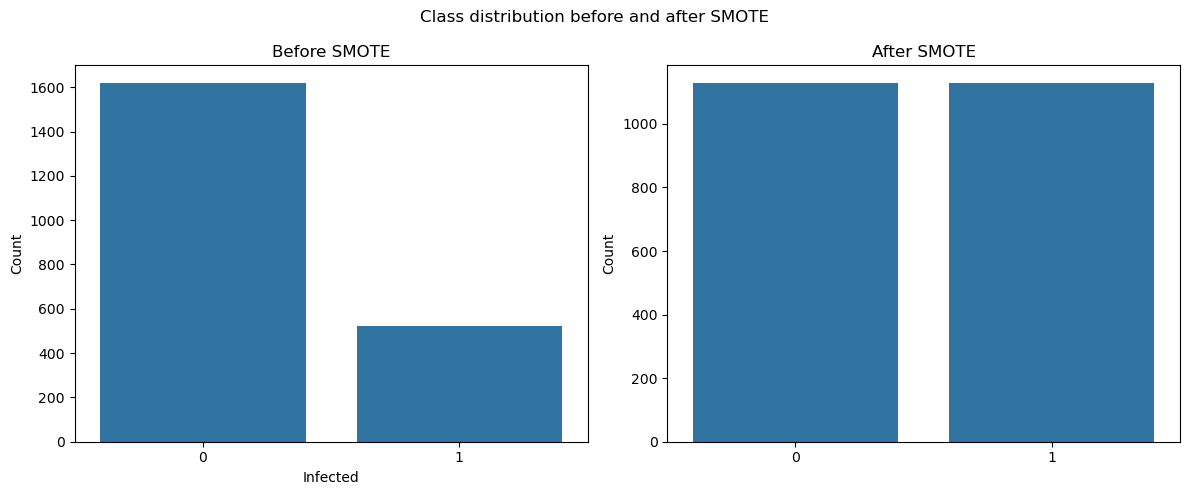

In [9]:
y = pd.Series(y, name="Infected")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
sns.countplot(x=y, ax=ax1)
ax1.set_title('Before SMOTE')
ax1.set_ylabel('Count')

sns.countplot(x=y_train_balanced, ax=ax2)
ax2.set_title('After SMOTE')
ax2.set_ylabel('Count')

plt.suptitle('Class distribution before and after SMOTE')
plt.tight_layout()
plt.show()



In [11]:
# #mixed scaling:
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import MinMaxScaler, StandardScaler

# # Assume X_train_balanced and X_test are pandas DataFrames
# # Specify the feature columns for each scaler
# minmax_features = [
# standard_features = ['feature3', 'feature4']  # Columns to scale with StandardScaler

# # Create the column transformer
# scaler = ColumnTransformer(
#     transformers=[
#         ('minmax', MinMaxScaler(), minmax_features),  # Apply MinMaxScaler to selected features
#         ('standard', StandardScaler(), standard_features)  # Apply StandardScaler to other features
#     ],
#     remainder='passthrough'  # Keep other columns unchanged
# )

# # Fit and transform the training data
# X_train_scaled = scaler.fit_transform(X_train_balanced)

# # Transform the test data
# X_test_scaled = scaler.transform(X_test)

Scaling the data with MinMaxScaler:

In [10]:
from sklearn.preprocessing import MinMaxScaler

n_scaler = MinMaxScaler()
X_train_scaled_n_scaler = n_scaler.fit_transform(X_train_balanced)
X_test_scaled_n_scaler = n_scaler.transform(X_test)

Visualise before and after scaling (MinMaxScaler):

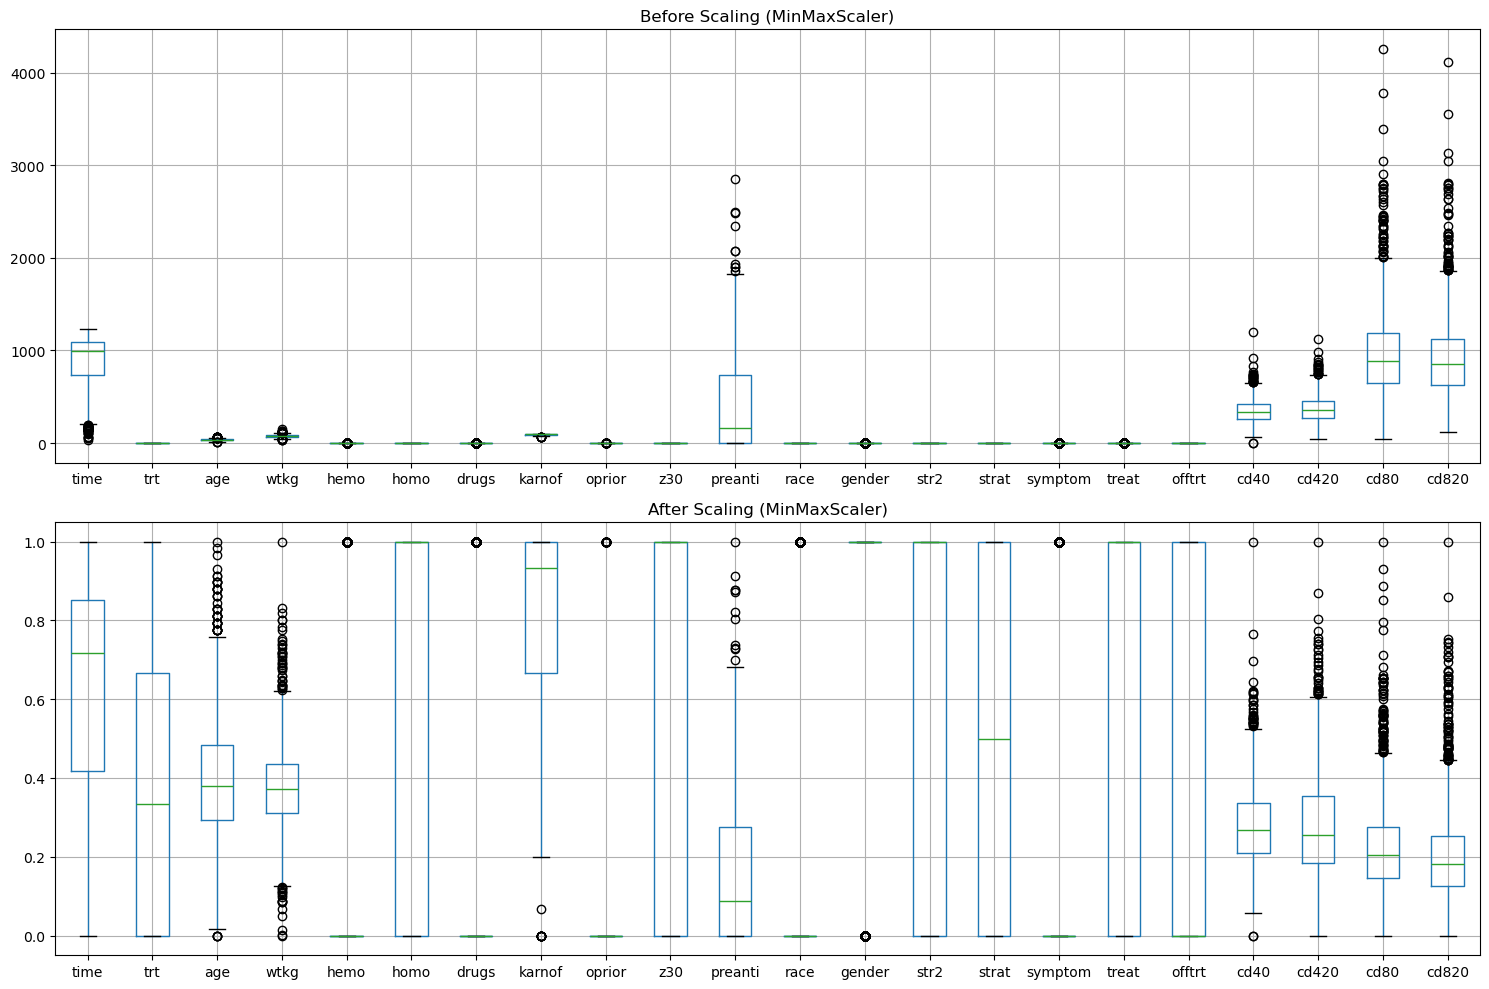

In [11]:
fig, axes = plt.subplots(2, 1, figsize=(15, 10))

X_train_df = pd.DataFrame(X_train)
X_train_scaled_df = pd.DataFrame(X_train_scaled_n_scaler, columns=X.columns)

X_train_df.boxplot(ax=axes[0])
axes[0].set_title('Before Scaling (MinMaxScaler)')

X_train_scaled_df.boxplot(ax=axes[1])
axes[1].set_title('After Scaling (MinMaxScaler)')

plt.tight_layout()
plt.show()

In [14]:
minmax_features = []

Scaling with StandardScaler:

In [12]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
X_train_scaled_std_scaler = std_scaler.fit_transform(X_train_balanced)
X_test_scaled_std_scaler = std_scaler.transform(X_test)

Visualise before and after scaling(Standaed Scaler):

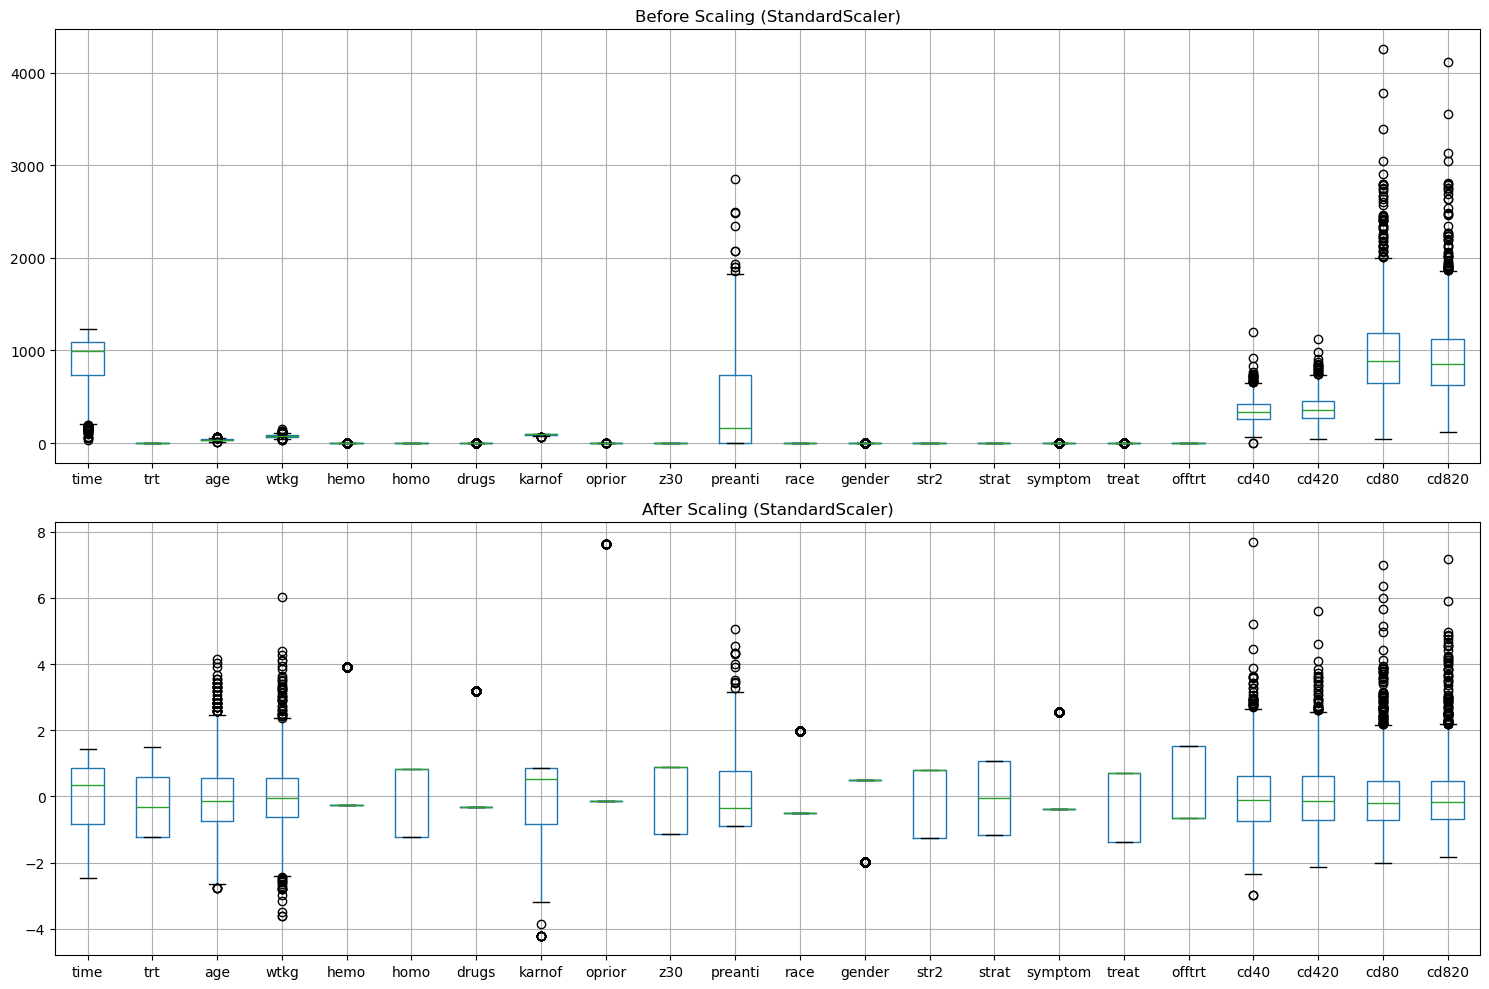

In [13]:

fig, axes = plt.subplots(2, 1, figsize=(15, 10))

X_train_df = pd.DataFrame(X_train)
X_train_scaled_df = pd.DataFrame(X_train_scaled_std_scaler,columns=X.columns)

X_train_df.boxplot(ax=axes[0])
axes[0].set_title('Before Scaling (StandardScaler)')

X_train_scaled_df.boxplot(ax=axes[1])
axes[1].set_title('After Scaling (StandardScaler)')

plt.tight_layout()
plt.show()

Employing Mixed Scaling

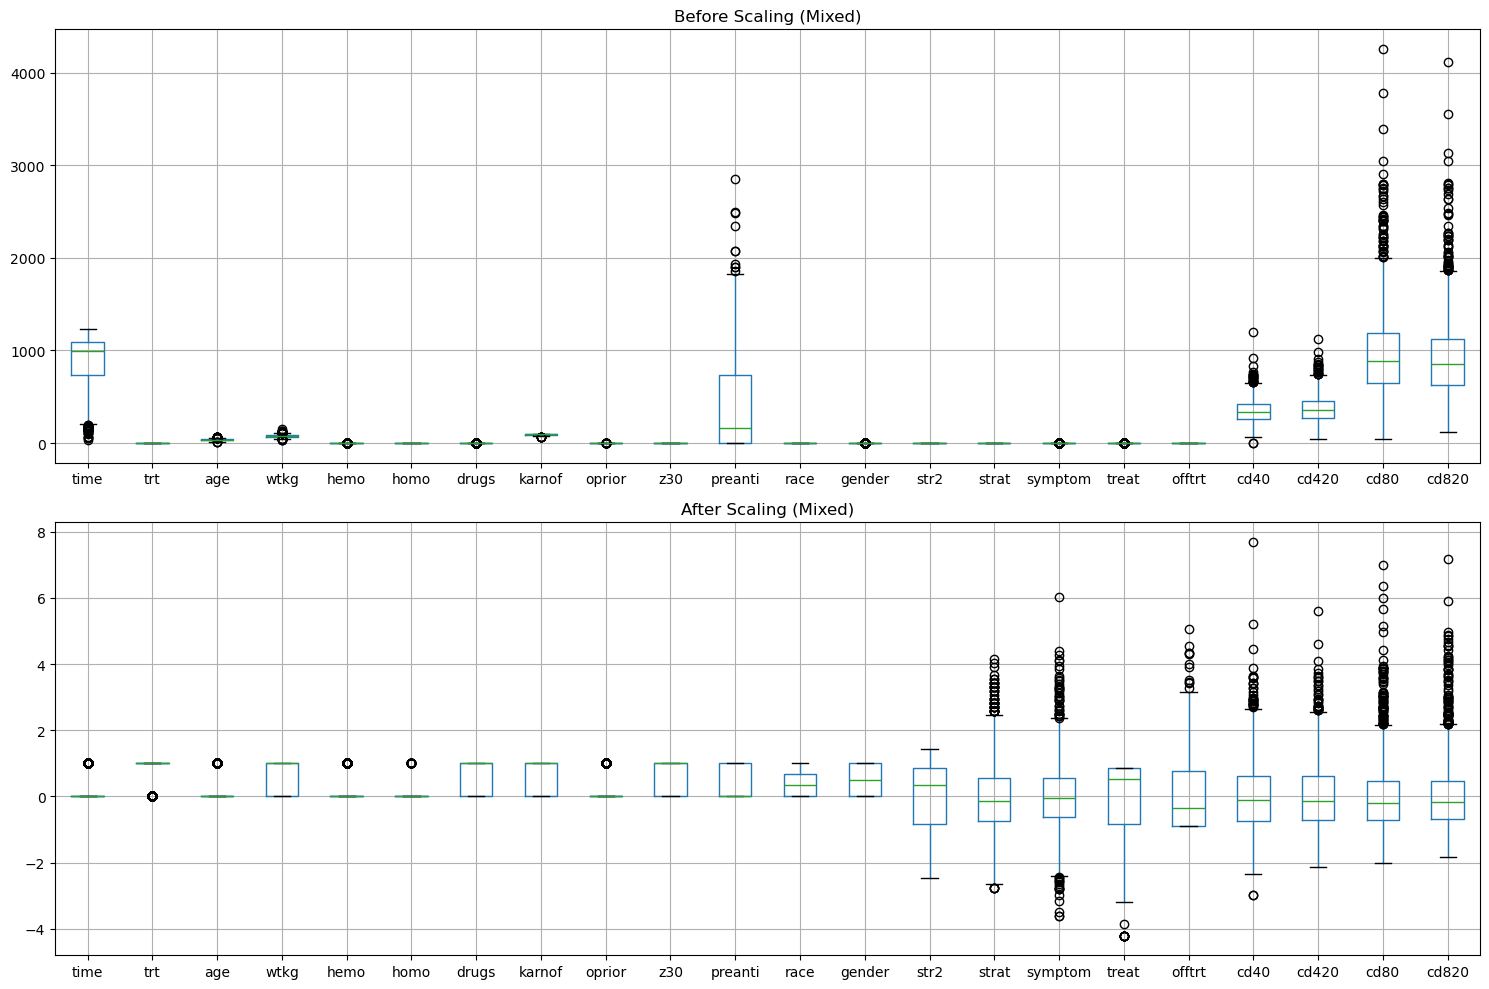

In [14]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, StandardScaler

minmax_features = [
    "race", "gender", "hemo", "homo", "drugs", "oprior", 
    "z30", "str2", "symptom", "treat", "offtrt", "trt", "strat"
]

standard_features = [
    "time", "age", "wtkg", "karnof", "preanti", "cd40", "cd420", 
    "cd80", "cd820"
]

scaler = ColumnTransformer(
    transformers=[
        ('minmax', MinMaxScaler(), minmax_features),
        ('standard', StandardScaler(), standard_features) 
    ],
    remainder='passthrough'
)

X_train_scaled_mixed = scaler.fit_transform(X_train_balanced)
X_test_scaled_mixed = scaler.transform(X_test)

fig, axes = plt.subplots(2, 1, figsize=(15, 10))

X_train_df = pd.DataFrame(X_train)
X_train_scaled_df = pd.DataFrame(X_train_scaled_mixed,columns=X.columns)

X_train_df.boxplot(ax=axes[0])
axes[0].set_title('Before Scaling (Mixed)')

X_train_scaled_df.boxplot(ax=axes[1])
axes[1].set_title('After Scaling (Mixed)')

plt.tight_layout()
plt.show()

Method to print the scores for each model:

In [15]:
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay

def print_scores(model, test_data, lr_accuracy, lr_precision, lr_recall, lr_f1_score, lr_cm):
    print(f'Accuracy: {lr_accuracy}')
    print(f'Precision: {lr_precision}')
    print(f'Recall: {lr_recall}')
    print(f'F1 Score: {lr_f1_score}')

    disp = ConfusionMatrixDisplay(confusion_matrix=lr_cm, display_labels=np.unique(y_test))
    disp.plot(cmap='Blues', values_format='d')
    plt.title('Confusion Matrix')
    plt.show()

    RocCurveDisplay.from_estimator(model, test_data, y_test)
    plt.title('ROC Curve')
    plt.show()

## Logistic Regression

### Initial Model

Test initial score with MinMaxScaler:

Accuracy: 0.8660436137071651
Precision: 0.70625
Recall: 0.743421052631579
F1 Score: 0.7243589743589743


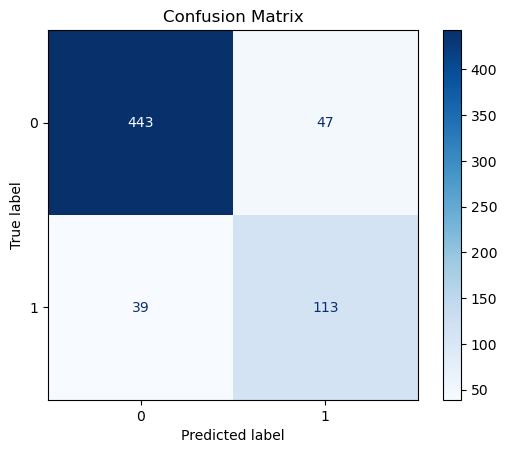

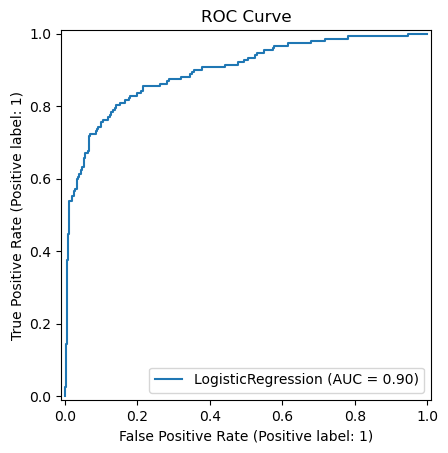

In [22]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=42)
lr.fit(X_train_scaled_n_scaler, y_train_balanced)
lr_pred_initial = lr.predict(X_test_scaled_n_scaler)

lr_accuracy_initial = metrics.accuracy_score(y_test, lr_pred_initial)
lr_precision_initial = metrics.precision_score(y_test, lr_pred_initial)
lr_recall_initial = metrics.recall_score(y_test, lr_pred_initial)
lr_f1_score_initial = metrics.f1_score(y_test, lr_pred_initial)
lr_cm_initial = metrics.confusion_matrix(y_test, lr_pred_initial)

print_scores(lr, X_test_scaled_n_scaler, lr_accuracy_initial, lr_precision_initial, lr_recall_initial, lr_f1_score_initial, lr_cm_initial)

Test initial scores with StandardScaler:

Accuracy: 0.8707165109034268
Precision: 0.7169811320754716
Recall: 0.75
F1 Score: 0.7331189710610932


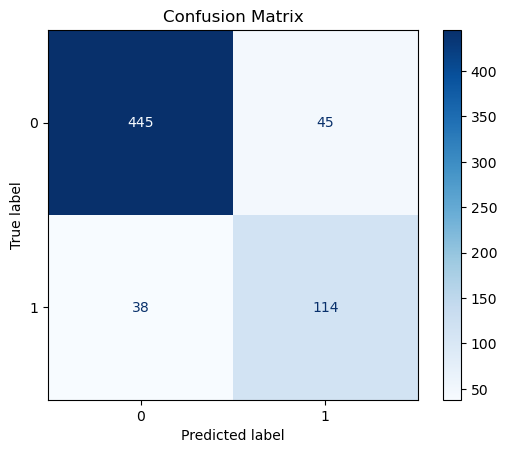

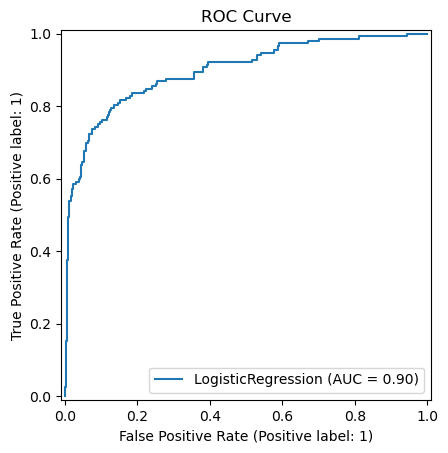

In [23]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=42)
lr.fit(X_train_scaled_std_scaler, y_train_balanced)


lr_pred = lr.predict(X_test_scaled_std_scaler)
lr_accuracy = metrics.accuracy_score(y_test, lr_pred)
lr_precision = metrics.precision_score(y_test, lr_pred)
lr_recall = metrics.recall_score(y_test, lr_pred)
lr_f1_score = metrics.f1_score(y_test, lr_pred)
lr_cm = metrics.confusion_matrix(y_test, lr_pred)

print_scores(lr, X_test_scaled_std_scaler, lr_accuracy, lr_precision, lr_recall, lr_f1_score, lr_cm)

Initial test results:

| Metric      | With Selected Features | With MinMaxScaler only | With StandardScaler only |   |
|-------------|------------------------|------------------------|--------------------------|---|
| Accuracy:   | 0.8582554517133957     | 0.8691588785046729     | 0.8644859813084113       |   |
| Precision:  | 0.6564102564102564     | 0.6868131868131868     | 0.6737967914438503       |   |
| Recall:     | 0.8421052631578947     | 0.8223684210526315     | 0.8289473684210527       |   |
| F1 Score:   | 0.7377521613832853     | 0.7485029940119761     | 0.7433628318584071       |   |

### Hyperparameter Tuning (GridSearchCV)

In [29]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [10000]
}

lr = LogisticRegression(random_state=42)
lr_cv = GridSearchCV(lr, param_grid, cv=5)


Fit with MinMaxScaler:

In [125]:
lr_cv.fit(X_train_scaled_n_scaler, y_train_balanced)

print(f'Best Parameters: {lr_cv.best_params_}')
print(f'Best Score: {lr_cv.best_score_}')

Best Parameters: {'C': 1, 'max_iter': 10000, 'penalty': 'l1', 'solver': 'liblinear'}
Best Score: 0.8750397347094951


Fit with StandardScaler

In [30]:
lr_cv.fit(X_train_scaled_std_scaler, y_train_balanced)

print(f'Best Parameters: {lr_cv.best_params_}')
print(f'Best Score: {lr_cv.best_score_}')

Best Parameters: {'C': 0.1, 'max_iter': 10000, 'penalty': 'l1', 'solver': 'liblinear'}
Best Score: 0.8745962757294509


In [31]:
lr_cv.fit(X_train_scaled_mixed, y_train_balanced)

print(f'Best Parameters: {lr_cv.best_params_}')
print(f'Best Score: {lr_cv.best_score_}')

Best Parameters: {'C': 1, 'max_iter': 10000, 'penalty': 'l1', 'solver': 'liblinear'}
Best Score: 0.8745952946255127


Test hyperparameter tuning with MinMaxSclaler

Accuracy: 0.8691588785046729
Precision: 0.7098765432098766
Recall: 0.756578947368421
F1 Score: 0.732484076433121


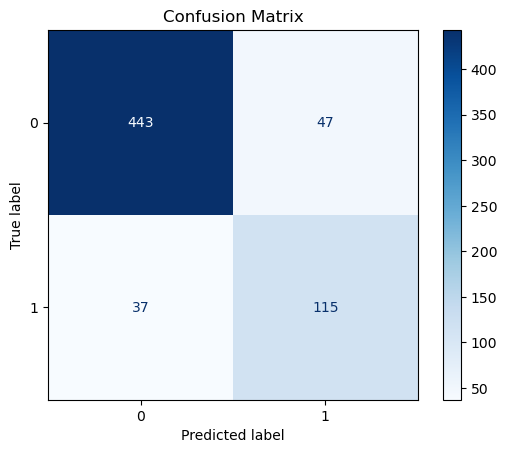

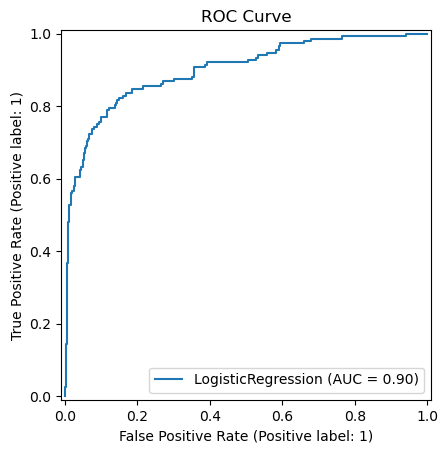

In [32]:
lr = LogisticRegression(random_state=42, C=1, max_iter=10000, penalty='l1', solver='liblinear')
lr.fit(X_train_scaled_n_scaler, y_train_balanced)
lr_pred = lr.predict(X_test_scaled_n_scaler)

lr_accuracy = metrics.accuracy_score(y_test, lr_pred)
lr_precision = metrics.precision_score(y_test, lr_pred)
lr_recall = metrics.recall_score(y_test, lr_pred)
lr_f1_score = metrics.f1_score(y_test, lr_pred)
lr_cm = metrics.confusion_matrix(y_test, lr_pred)

print_scores(lr, X_test_scaled_n_scaler, lr_accuracy, lr_precision, lr_recall, lr_f1_score, lr_cm)

Test hyperparameter tuning with StandardScaler:

Accuracy: 0.8769470404984424
Precision: 0.7295597484276729
Recall: 0.7631578947368421
F1 Score: 0.7459807073954984


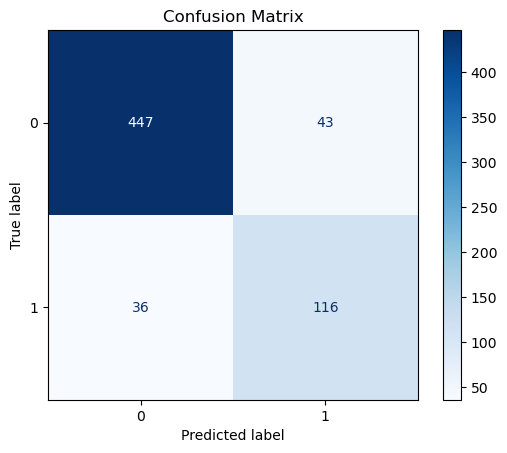

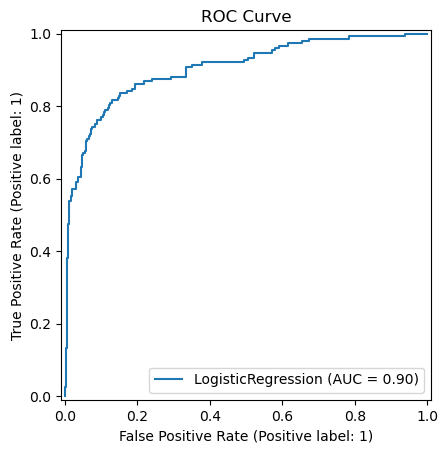

In [40]:
lr = LogisticRegression(random_state=42, C=0.1, max_iter=10000, penalty='l1', solver='saga')
lr.fit(X_train_scaled_std_scaler, y_train_balanced)
lr_pred = lr.predict(X_test_scaled_std_scaler)

lr_accuracy = metrics.accuracy_score(y_test, lr_pred)
lr_precision = metrics.precision_score(y_test, lr_pred)
lr_recall = metrics.recall_score(y_test, lr_pred)
lr_f1_score = metrics.f1_score(y_test, lr_pred)
lr_cm = metrics.confusion_matrix(y_test, lr_pred)

print_scores(lr, X_test_scaled_std_scaler, lr_accuracy, lr_precision, lr_recall, lr_f1_score, lr_cm)

### Final Model

 Model: Logistic Regression  
 
 Scaler: Standard Scaler  

 Hyperparameters:  
- `random_state`: 42  
- `C`: 0.1  
- `penalty`: 'l1'  
- `solver`: 'saga'  

#### Performance Comparison:
| **Metric**   | **Initial** | **Final**  |
|--------------|-------------|------------|
| **Accuracy** | 0.869       | 0.879      |
| **Precision**| 0.687       | 0.703      |
| **Recall**   | 0.822       | 0.842      |
| **F1 Score** | 0.749       | 0.766      |

Accuracy: 0.8769470404984424
Precision: 0.7295597484276729
Recall: 0.7631578947368421
F1 Score: 0.7459807073954984


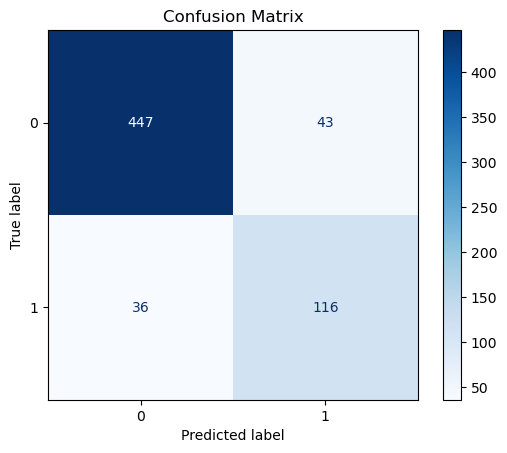

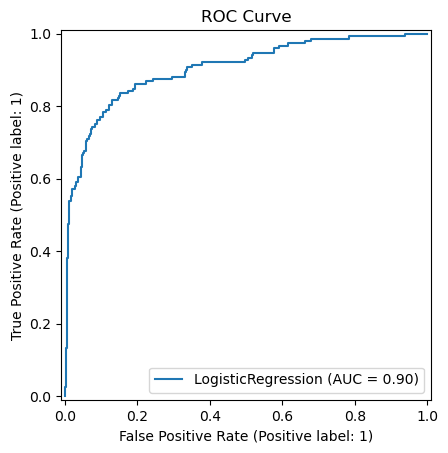

In [ ]:
lr_final = LogisticRegression(random_state=42, C=0.1, penalty='l1', solver='saga')
lr_final.fit(X_train_scaled_std_scaler, y_train_balanced)
lr_pred_final = lr.predict(X_test_scaled_std_scaler)

lr_accuracy_final = metrics.accuracy_score(y_test, lr_pred_final)
lr_precision_final = metrics.precision_score(y_test, lr_pred_final)
lr_recall_final = metrics.recall_score(y_test, lr_pred_final)
lr_f1_score_final = metrics.f1_score(y_test, lr_pred_final)
lr_cm_final = metrics.confusion_matrix(y_test, lr_pred_final)

print_scores(lr_final, X_test_scaled_std_scaler, lr_accuracy_final, lr_precision_final, lr_recall_final, lr_f1_score_final, lr_cm_final)


Final Results: Logistic Regression
Accuracy: 0.8660436137071651 -> 0.8769470404984424
Precision: 0.70625 -> 0.7295597484276729
Recall: 0.743421052631579 -> 0.7631578947368421
F1 Score: 0.7243589743589743 -> 0.7459807073954984


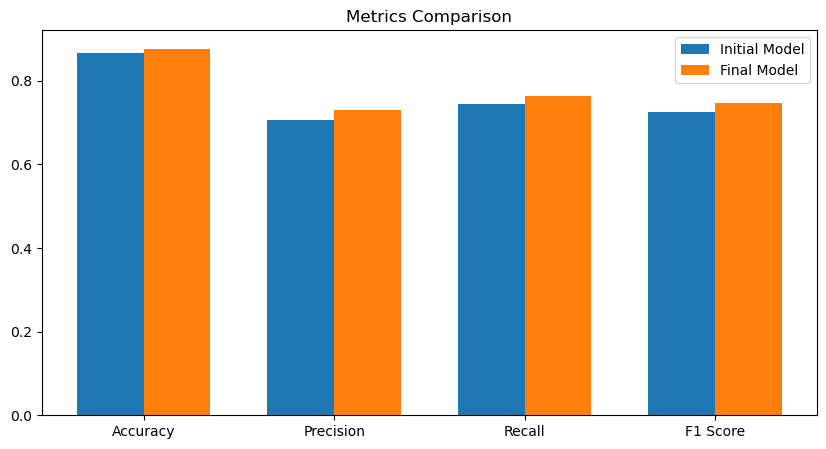

In [42]:
print(f'Final Results: Logistic Regression')
print(f'Accuracy: {lr_accuracy_initial} -> {lr_accuracy_final}')
print(f'Precision: {lr_precision_initial} -> {lr_precision_final}')
print(f'Recall: {lr_recall_initial} -> {lr_recall_final}')
print(f'F1 Score: {lr_f1_score_initial} -> {lr_f1_score_final}')


fig, ax = plt.subplots(figsize=(10, 5))

metrics_list = [lr_accuracy_initial, lr_precision_initial, lr_recall_initial, lr_f1_score_initial]
metrics_list_final = [lr_accuracy, lr_precision, lr_recall, lr_f1_score]
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

x = np.arange(len(metrics_list))
bar_width = 0.35

ax.bar(x, metrics_list, bar_width, label='Initial Model')
ax.bar(x + bar_width, metrics_list_final, bar_width, label='Final Model')

ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(metrics_names)
ax.set_title('Metrics Comparison')
ax.legend()
plt.show()

## Support Vector Machine (SVM)

### Initial Model

Testing with feature selection:

Accuracy: 0.881619937694704
Precision: 0.7714285714285715
Recall: 0.7105263157894737
F1 Score: 0.7397260273972602


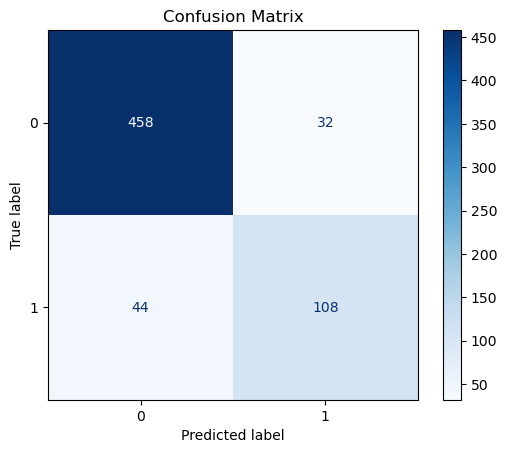

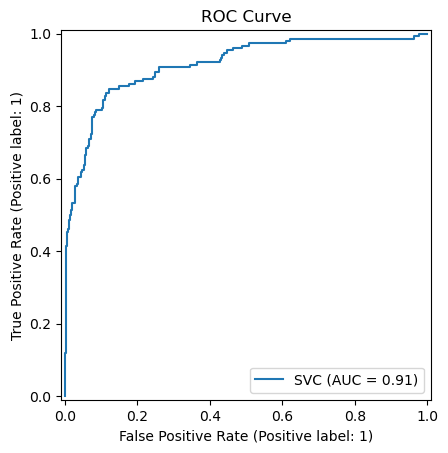

In [44]:
from sklearn.svm import SVC

svm = SVC(random_state=42)
svm.fit(X_train_scaled_n_scaler, y_train_balanced)

svm_pred_initial = svm.predict(X_test_scaled_n_scaler)

svm_accuracy_initial = metrics.accuracy_score(y_test, svm_pred_initial)
svm_precision_initial = metrics.precision_score(y_test, svm_pred_initial)
svm_recall_initial = metrics.recall_score(y_test, svm_pred_initial)
svm_f1_score_initial = metrics.f1_score(y_test, svm_pred_initial)
svm_cm_initial = metrics.confusion_matrix(y_test, svm_pred_initial)

print_scores(svm, X_test_scaled_n_scaler, svm_accuracy_initial, svm_precision_initial, svm_recall_initial, svm_f1_score_initial, svm_cm_initial)

Testing with MinMaxScaler:

Accuracy: 0.881619937694704
Precision: 0.7714285714285715
Recall: 0.7105263157894737
F1 Score: 0.7397260273972602


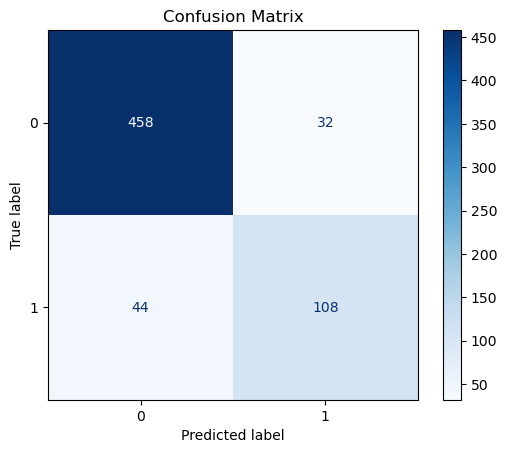

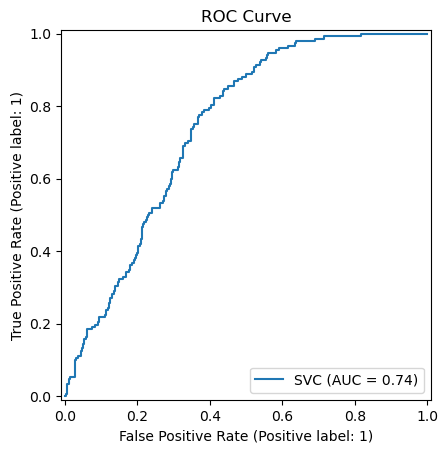

In [58]:
from sklearn.svm import SVC

svm = SVC(random_state=42)
svm.fit(X_train_scaled_n_scaler, y_train_balanced)

svm_pred = svm.predict(X_test_scaled_n_scaler)

svm_accuracy = metrics.accuracy_score(y_test, svm_pred)
svm_precision = metrics.precision_score(y_test, svm_pred)
svm_recall = metrics.recall_score(y_test, svm_pred)
svm_f1_score = metrics.f1_score(y_test, svm_pred)
svm_cm = metrics.confusion_matrix(y_test, svm_pred)

print_scores(svm, X_test_scaled_std_scaler, svm_accuracy, svm_precision, svm_recall, svm_f1_score, svm_cm)

Testing with StandardScaler:

Accuracy: 0.8925233644859814
Precision: 0.8029197080291971
Recall: 0.7236842105263158
F1 Score: 0.7612456747404844


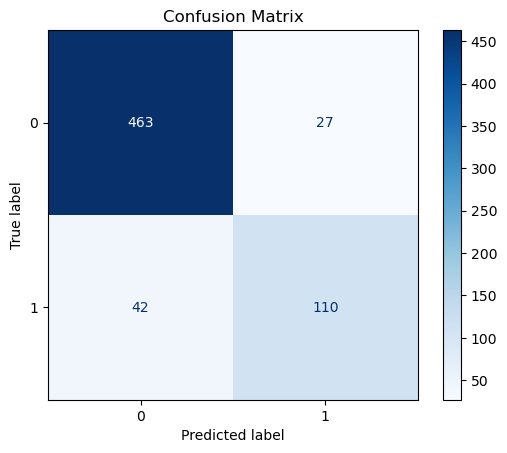

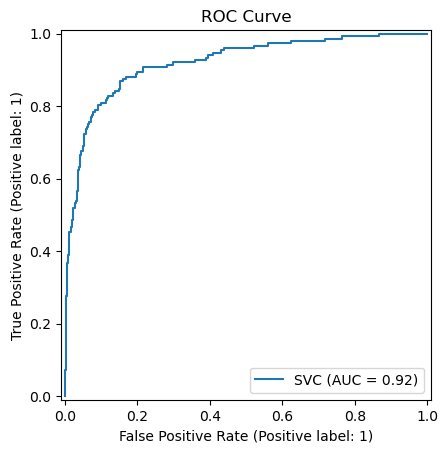

In [59]:
from sklearn.svm import SVC

svm = SVC(random_state=42)
svm.fit(X_train_scaled_std_scaler, y_train_balanced)

svm_pred = svm.predict(X_test_scaled_std_scaler)

svm_accuracy = metrics.accuracy_score(y_test, svm_pred)
svm_precision = metrics.precision_score(y_test, svm_pred)
svm_recall = metrics.recall_score(y_test, svm_pred)
svm_f1_score = metrics.f1_score(y_test, svm_pred)
svm_cm = metrics.confusion_matrix(y_test, svm_pred)

print_scores(svm, X_test_scaled_std_scaler, svm_accuracy, svm_precision, svm_recall, svm_f1_score, svm_cm)

### Hyperparameter Tuning

In [47]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'class_weight': ['balanced', None],
    'gamma': ['scale', 'auto']
}

svm = SVC(random_state=42)
svm_cv = GridSearchCV(svm, param_grid, cv=5)

Tuning with MinMaxScaler:

In [ ]:
svm_cv.fit(X_train_scaled_n_scaler, y_train_balanced)

print(f'Best Parameters: {svm_cv.best_params_}')
print(f'Best Score: {svm_cv.best_score_}')

Best Parameters: {'C': 10, 'class_weight': 'balanced', 'gamma': 'scale', 'kernel': 'rbf'}
Best Score: 0.891882346015737


Tuning with StandardScaler:

In [66]:
svm_cv.fit(X_train_scaled_std_scaler, y_train_balanced)

print(f'Best Parameters: {svm_cv.best_params_}')
print(f'Best Score: {svm_cv.best_score_}')

Best Parameters: {'C': 10, 'class_weight': 'balanced', 'gamma': 'auto', 'kernel': 'rbf'}
Best Score: 0.892765339560073


Testing the model:

In [74]:
svm = SVC(random_state=42, C=10, class_weight='balanced', gamma='auto', kernel='rbf')

Test with MinMaxScaled:

Accuracy: 0.881619937694704
Precision: 0.75
Recall: 0.75
F1 Score: 0.7054794520547946


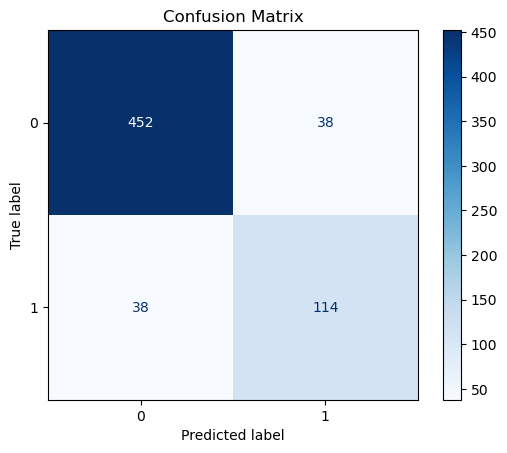

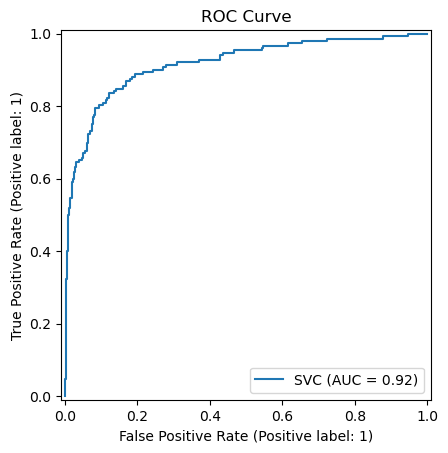

In [75]:
svm.fit(X_train_scaled_n_scaler, y_train_balanced)
svm_pred = svm.predict(X_test_scaled_n_scaler)

svm_accuracy = metrics.accuracy_score(y_test, svm_pred)
svm_precision = metrics.precision_score(y_test, svm_pred)
svm_recall = metrics.recall_score(y_test, svm_pred)
svm_cm = metrics.confusion_matrix(y_test, svm_pred)

print_scores(svm, X_test_scaled_n_scaler, svm_accuracy, svm_precision, svm_recall, svm_f1_score, svm_cm)

Test with StandardScaler:

Accuracy: 0.8660436137071651
Precision: 0.7357142857142858
Recall: 0.6776315789473685
F1 Score: 0.7054794520547946


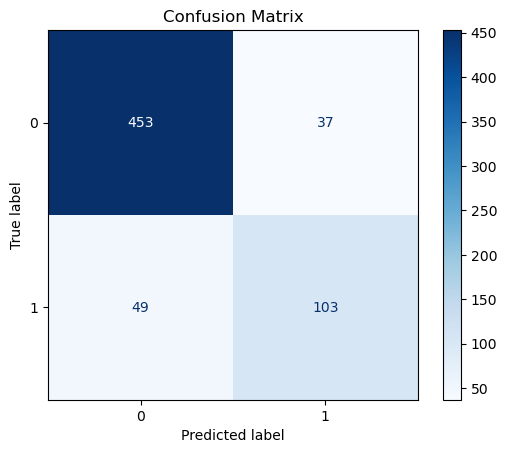

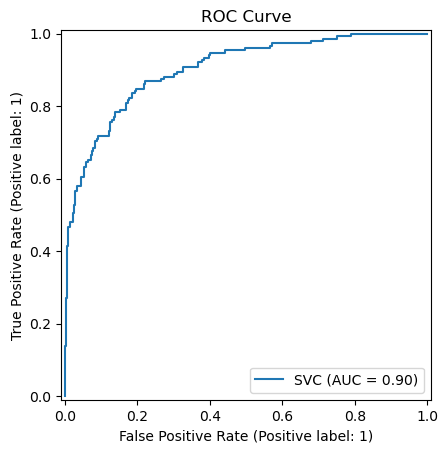

In [76]:
svm.fit(X_train_scaled_std_scaler, y_train_balanced)
svm_pred = svm.predict(X_test_scaled_std_scaler)

svm_accuracy = metrics.accuracy_score(y_test, svm_pred)
svm_precision = metrics.precision_score(y_test, svm_pred)
svm_recall = metrics.recall_score(y_test, svm_pred)
svm_f1_score = metrics.f1_score(y_test, svm_pred)
svm_cm = metrics.confusion_matrix(y_test, svm_pred)

print_scores(svm, X_test_scaled_std_scaler, svm_accuracy, svm_precision, svm_recall, svm_f1_score, svm_cm)

### Final Model: Support Vector Machine (SVM)
#### Scaler: MinMaxScaler
#### Model Parameters:
- `random_state`: 42  
- `C`: 10  
- `class_weight`: 'balanced'  
- `gamma`: 'scale'  
- `kernel`: 'rbf'  

#### Performance Comparison:
| **Metric**   | **Initial** | **Final**  |
|--------------|-------------|------------|
| **Accuracy** | 0.829       | 0.893      |
| **Precision**| 0.5875      | 0.817      |
| **Recall**   | 0.928       | 0.704      |
| **F1 Score** | 0.719       | 0.756      |



Accuracy: 0.8660436137071651
Precision: 0.7357142857142858
Recall: 0.6776315789473685
F1 Score: 0.7054794520547946


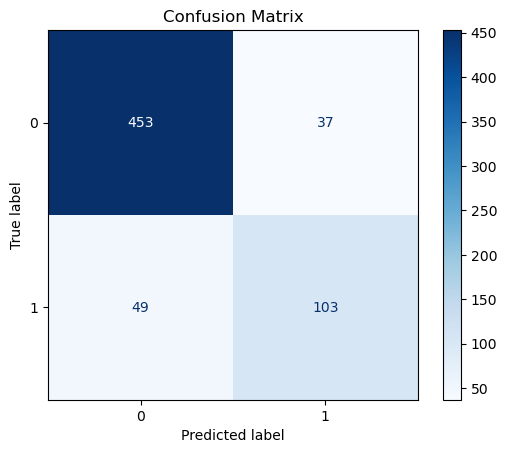

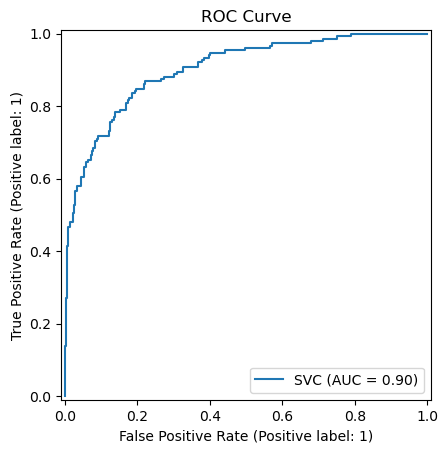

In [70]:
svm.fit(X_train_scaled_std_scaler, y_train_balanced)
svm_pred = svm.predict(X_test_scaled_std_scaler)

svm_accuracy_final = metrics.accuracy_score(y_test, svm_pred)
svm_precision_final = metrics.precision_score(y_test, svm_pred)
svm_recall_final = metrics.recall_score(y_test, svm_pred)
svm_f1_score_final = metrics.f1_score(y_test, svm_pred)
svm_cm_final = metrics.confusion_matrix(y_test, svm_pred)

print_scores(svm, X_test_scaled_std_scaler, svm_accuracy_final, svm_precision_final, svm_recall_final, svm_f1_score_final, svm_cm_final)

Final Results: SVM
Accuracy: 0.8286604361370716 -> 0.8925233644859814
Precision: 0.5875 -> 0.816793893129771
Recall: 0.9276315789473685 -> 0.7039473684210527
F1 Score: 0.7193877551020408 -> 0.7561837455830389


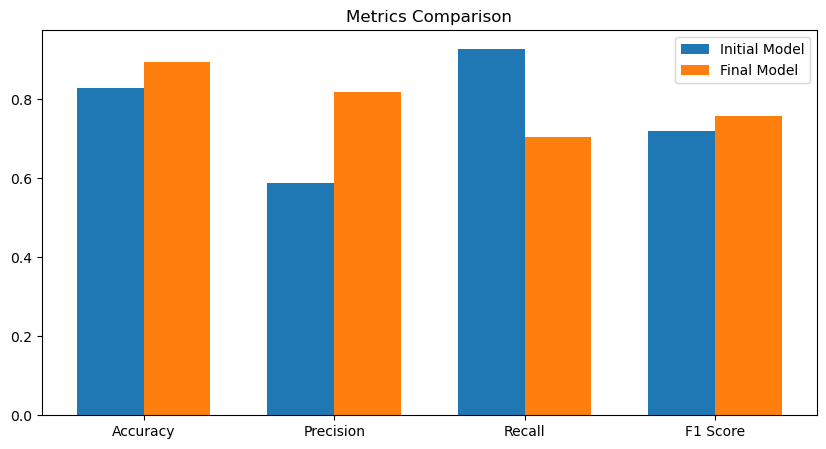

In [40]:
#compare the initial and final results
print(f'Final Results: SVM')
print(f'Accuracy: {svm_accuracy_initial} -> {svm_accuracy_final}')
print(f'Precision: {svm_precision_initial} -> {svm_precision_final}')
print(f'Recall: {svm_recall_initial} -> {svm_recall_final}')
print(f'F1 Score: {svm_f1_score_initial} -> {svm_f1_score_final}')

fig, ax = plt.subplots(figsize=(10, 5))

metrics_list = [svm_accuracy_initial, svm_precision_initial, svm_recall_initial, svm_f1_score_initial]
metrics_list_final = [svm_accuracy_final, svm_precision_final, svm_recall_final, svm_f1_score_final]
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

x = np.arange(len(metrics_list))
bar_width = 0.35

ax.bar(x, metrics_list, bar_width, label='Initial Model')
ax.bar(x + bar_width, metrics_list_final, bar_width, label='Final Model')

ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(metrics_names)
ax.set_title('Metrics Comparison')
ax.legend()
plt.show()

## CatBoostClassifier

## Initial Model

In [24]:
from catboost import CatBoostClassifier

cat = CatBoostClassifier(random_state=42, verbose=0)

Test with MinMaxScaler

Accuracy: 0.8894080996884736
Precision: 0.7612903225806451
Recall: 0.7763157894736842
F1 Score: 0.7687296416938111


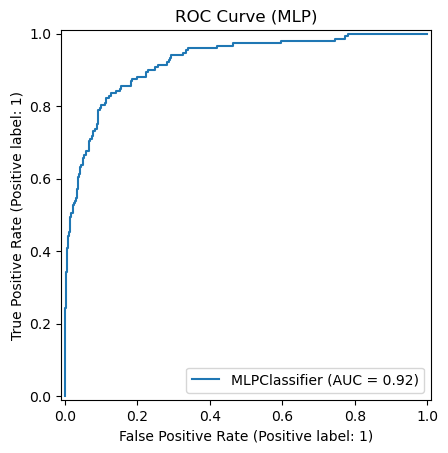

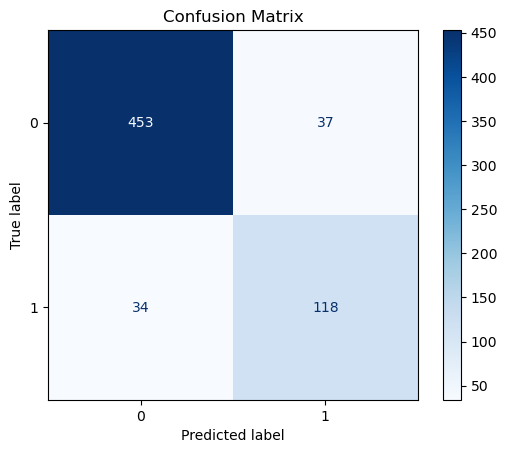

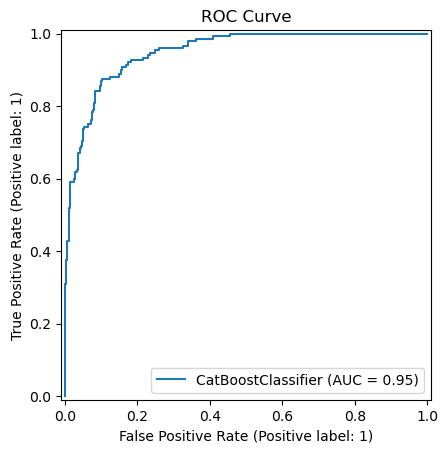

In [25]:
from catboost import CatBoostClassifier

cat = CatBoostClassifier(random_state=42, verbose=0)

cat.fit(X_train_scaled_n_scaler, y_train_balanced)
cat_pred_initial = cat.predict(X_test_scaled_n_scaler)

cat_accuracy_initial = metrics.accuracy_score(y_test, cat_pred_initial)
cat_precision_initial = metrics.precision_score(y_test, cat_pred_initial)
cat_recall_initial = metrics.recall_score(y_test, cat_pred_initial)
cat_f1_score_initial = metrics.f1_score(y_test, cat_pred_initial)

cat_cm_initial = metrics.confusion_matrix(y_test, cat_pred_initial)

print_scores(cat, X_test_scaled_n_scaler, cat_accuracy_initial, cat_precision_initial, cat_recall_initial, cat_f1_score_initial, cat_cm_initial)


Testing with StandardScaler:

Accuracy: 0.8894080996884736
Precision: 0.7612903225806451
Recall: 0.7763157894736842
F1 Score: 0.7687296416938111


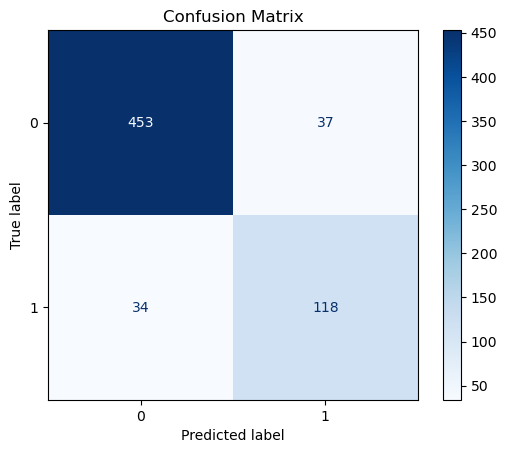

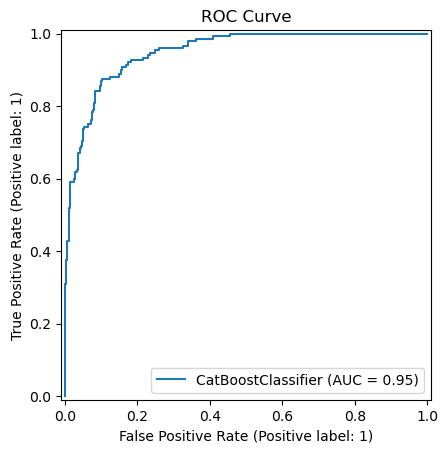

In [26]:
from catboost import CatBoostClassifier

cat = CatBoostClassifier(random_state=42, verbose=0)

cat.fit(X_train_scaled_std_scaler, y_train_balanced)
cat_pred = cat.predict(X_test_scaled_std_scaler)


cat_accuracy = metrics.accuracy_score(y_test, cat_pred)
cat_precisionl = metrics.precision_score(y_test, cat_pred)
cat_recall= metrics.recall_score(y_test, cat_pred)
cat_f1_score = metrics.f1_score(y_test, cat_pred)

cat_cm_initial = metrics.confusion_matrix(y_test, cat_pred)

print_scores(cat, X_test_scaled_std_scaler, cat_accuracy, cat_precisionl, cat_recall, cat_f1_score, cat_cm_initial)

Testing without scaling

Accuracy: 0.8894080996884736
Precision: 0.7612903225806451
Recall: 0.7763157894736842
F1 Score: 0.7687296416938111


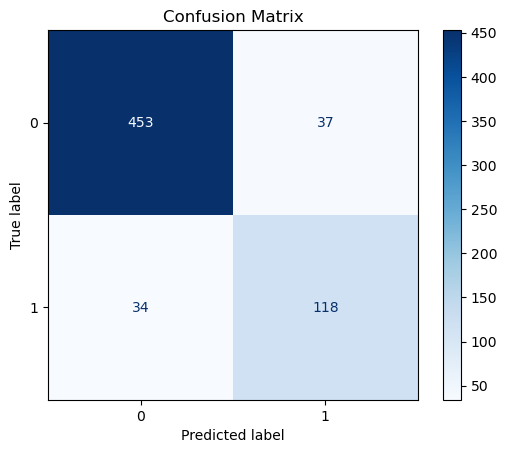

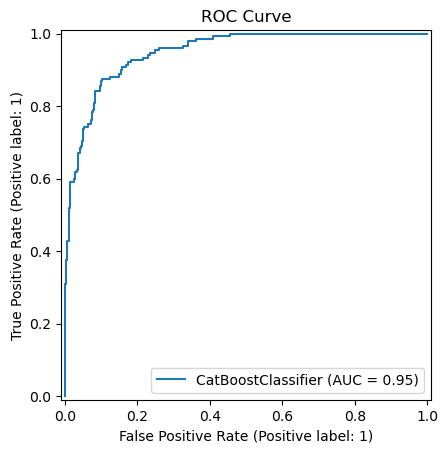

In [115]:
cat.fit(X_train_balanced, y_train_balanced)
cat_pred = cat.predict(X_test)
cat_accuracy = metrics.accuracy_score(y_test, cat_pred)
cat_precisionl = metrics.precision_score(y_test, cat_pred)
cat_recall= metrics.recall_score(y_test, cat_pred)
cat_f1_score = metrics.f1_score(y_test, cat_pred)

cat_cm_initial = metrics.confusion_matrix(y_test, cat_pred)

print_scores(cat, X_test, cat_accuracy, cat_precisionl, cat_recall, cat_f1_score, cat_cm_initial)

### Tuning Hyperparameters

GridSearchCV:

In [100]:
param_grid = {
    'learning_rate': [0.01, 0.1, 1],
    'depth': [4, 6, 8],
}

cat = CatBoostClassifier(random_state=42, verbose=0)
cat_cv = GridSearchCV(cat, param_grid, cv=5)

cat_cv.fit(X_train_balanced, y_train_balanced)

print(f'Best Parameters: {cat_cv.best_params_}')



Best Parameters: {'depth': 8, 'learning_rate': 0.1}


In [98]:
#using optuna for hyperparameter tuning
import optuna
from catboost import CatBoostClassifier

def objective(trial):
    params = {
       'iterations': trial.suggest_int('iterations', 100, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.5),
        'depth': trial.suggest_int('depth', 1, 12),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1e-3, 10.0),
        'border_count': trial.suggest_int('border_count', 1, 255),
        'thread_count': -1,
        'loss_function': 'MultiClass',
        'eval_metric': 'Accuracy'
   }
    

    cat = CatBoostClassifier(random_state=42, verbose=0, **params)
    cat.fit(X_train_balanced, y_train_balanced)
    cat_pred = cat.predict(X_test)
    cat_accuracy = metrics.accuracy_score(y_test, cat_pred)

    return cat_accuracy

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

[I 2024-11-26 21:33:15,723] A new study created in memory with name: no-name-f6b53a9e-4808-45eb-a9b9-a39079226933
[I 2024-11-26 21:33:17,805] Trial 0 finished with value: 0.883177570093458 and parameters: {'iterations': 625, 'learning_rate': 0.21189786312043402, 'depth': 2, 'l2_leaf_reg': 0.6869291312929016, 'border_count': 10}. Best is trial 0 with value: 0.883177570093458.
[I 2024-11-26 21:34:41,003] Trial 1 finished with value: 0.8847352024922118 and parameters: {'iterations': 368, 'learning_rate': 0.12403273542691946, 'depth': 12, 'l2_leaf_reg': 5.997097128667872, 'border_count': 243}. Best is trial 1 with value: 0.8847352024922118.
[I 2024-11-26 21:34:42,643] Trial 2 finished with value: 0.8862928348909658 and parameters: {'iterations': 309, 'learning_rate': 0.2262532899408954, 'depth': 6, 'l2_leaf_reg': 7.784623742132897, 'border_count': 141}. Best is trial 2 with value: 0.8862928348909658.
[I 2024-11-26 21:34:44,232] Trial 3 finished with value: 0.8925233644859814 and parameters

Best Trial Summary

The best trial was **Trial 24** with the following parameters:

- **Iterations:** 290 
- **Learning Rate:** 0.0374011606410238  
- **Depth:** 5  
- **L2 Leaf Reg:**0.5671800106731704  
- **Border Count:** 24  

**Best Value:** 0.9221183800623053


### Final Model

Accuracy: 0.897196261682243
Precision: 0.7721518987341772
Recall: 0.8026315789473685
F1 Score: 0.7870967741935484


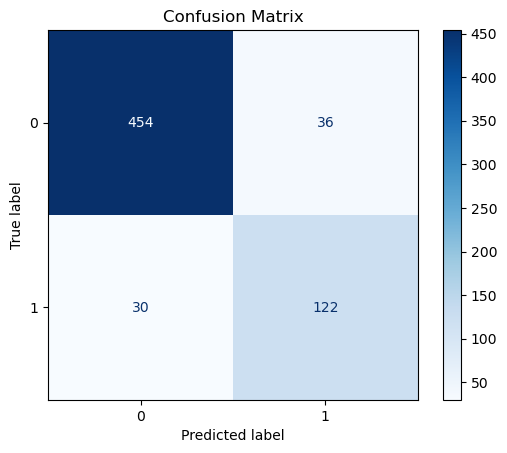

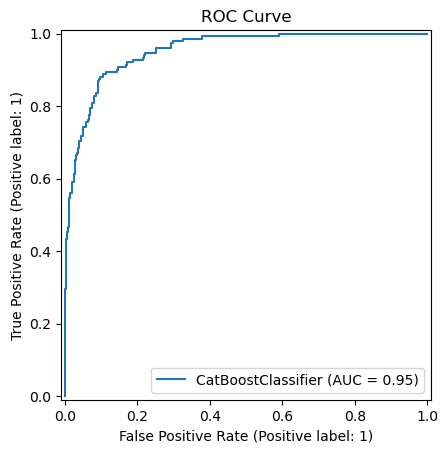

In [111]:
#  {'iterations': 290, 'learning_rate': 0.03740116064102382, 'depth': 5, 'l2_leaf_reg': 0.5671800106731704, 'border_count': 24}. Best is trial 76 with value: 0.9080996884735203.

cat_final = CatBoostClassifier(random_state=42, verbose=0, iterations=290, learning_rate=0.03740116064102382, depth=5, l2_leaf_reg=0.5671800106731704, border_count=24)
cat_final.fit(X_train_balanced, y_train_balanced)

cat_pred_final = cat_final.predict(X_test)
cat_accuracy_final = metrics.accuracy_score(y_test, cat_pred_final)
cat_precision_final = metrics.precision_score(y_test, cat_pred_final)
cat_recall_final = metrics.recall_score(y_test, cat_pred_final)
cat_f1_score_final = metrics.f1_score(y_test, cat_pred_final)
cat_cm_final = metrics.confusion_matrix(y_test, cat_pred_final)

print_scores(cat_final, X_test, cat_accuracy_final, cat_precision_final, cat_recall_final, cat_f1_score_final, cat_cm_final)

Final Results: CatBoost
Accuracy: 0.8894080996884736 -> 0.897196261682243
Precision: 0.7612903225806451 -> 0.7721518987341772
Recall: 0.7763157894736842 -> 0.8026315789473685
F1 Score: 0.7687296416938111 -> 0.7870967741935484


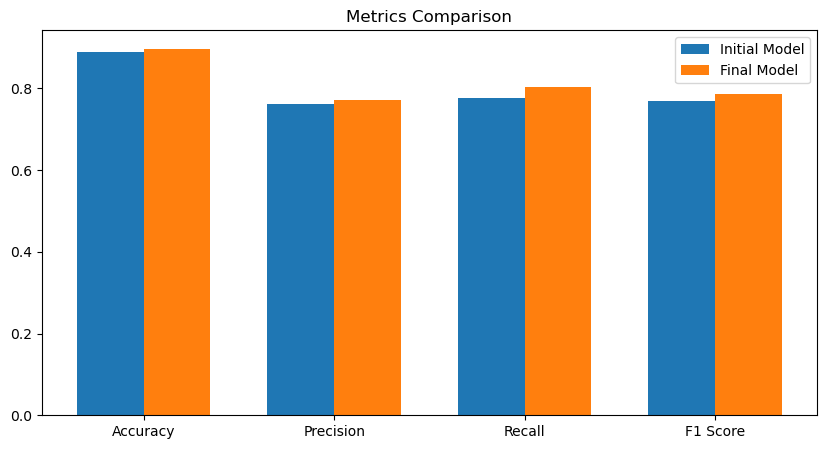

In [116]:

print(f'Final Results: CatBoost')
print(f'Accuracy: {cat_accuracy_initial} -> {cat_accuracy_final}')
print(f'Precision: {cat_precision_initial} -> {cat_precision_final}')
print(f'Recall: {cat_recall_initial} -> {cat_recall_final}')
print(f'F1 Score: {cat_f1_score_initial} -> {cat_f1_score_final}')

#plot metrics on same graph
fig, ax = plt.subplots(figsize=(10, 5))

metrics_list = [cat_accuracy_initial, cat_precision_initial, cat_recall_initial, cat_f1_score_initial]
metrics_list_final = [cat_accuracy_final, cat_precision_final, cat_recall_final, cat_f1_score_final]
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

x = np.arange(len(metrics_list))
bar_width = 0.35

ax.bar(x, metrics_list, bar_width, label='Initial Model')
ax.bar(x + bar_width, metrics_list_final, bar_width, label='Final Model')

ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(metrics_names)
ax.set_title('Metrics Comparison')
ax.legend()
plt.show()



## Neural Network

In [33]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(random_state=42)

c:\Users\bwelo\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.8769470404984424
Precision: 0.7588652482269503
Recall: 0.7039473684210527
F1 Score: 0.7303754266211604


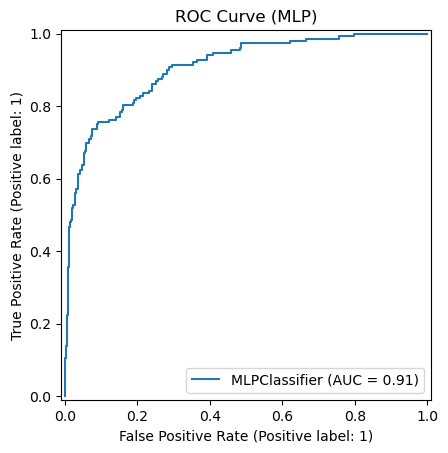

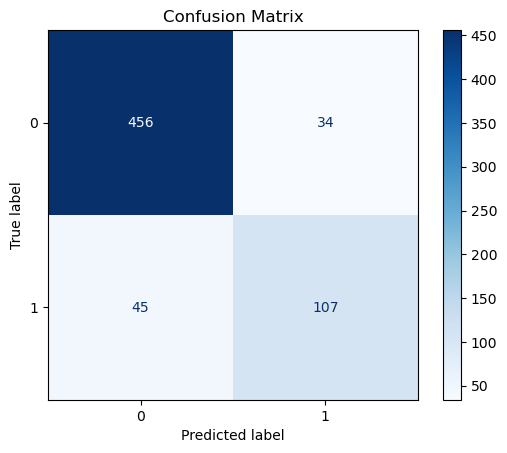

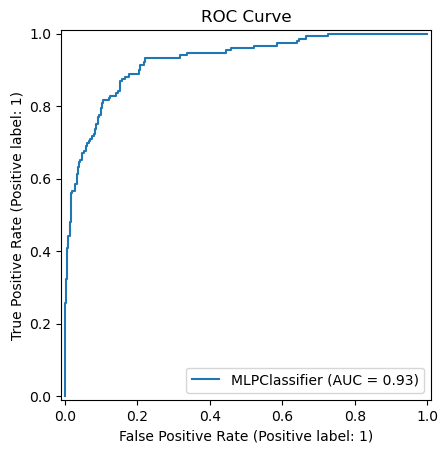

In [21]:
mlp.fit(X_train_scaled_std_scaler, y_train_balanced)
mlp_pred_initial = mlp.predict(X_test_scaled_std_scaler)

mlp_accuracy_initial = metrics.accuracy_score(y_test, mlp_pred_initial)
mlp_precision_initial = metrics.precision_score(y_test, mlp_pred_initial)
mlp_recall_initial = metrics.recall_score(y_test, mlp_pred_initial)
mlp_f1_score_initial = metrics.f1_score(y_test, mlp_pred_initial)
mlp_cm_initial = metrics.confusion_matrix(y_test, mlp_pred_initial)

print_scores(mlp, X_test_scaled_std_scaler, mlp_accuracy_initial, mlp_precision_initial, mlp_recall_initial, mlp_f1_score_initial, mlp_cm_initial)

In [122]:

param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (200,)],
    'activation': ['relu', 'tanh', 'logistic'],
}

mlp = MLPClassifier(random_state=42,max_iter=500, learning_rate_init=0.001)
mlp_cv = GridSearchCV(mlp, param_grid, cv=5)

mlp_cv.fit(X_train_scaled_n_scaler, y_train_balanced)

print(f'Best Parameters: {mlp_cv.best_params_}')

c:\Users\bwelo\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\bwelo\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\bwelo\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\bwelo\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\bwelo\anaconda3\Lib\site-packages\sklearn\neural_network\_multi

Best Parameters: {'activation': 'relu', 'hidden_layer_sizes': (200,)}


Accuracy: 0.8722741433021807
Precision: 0.7215189873417721
Recall: 0.75
F1 Score: 0.7354838709677419


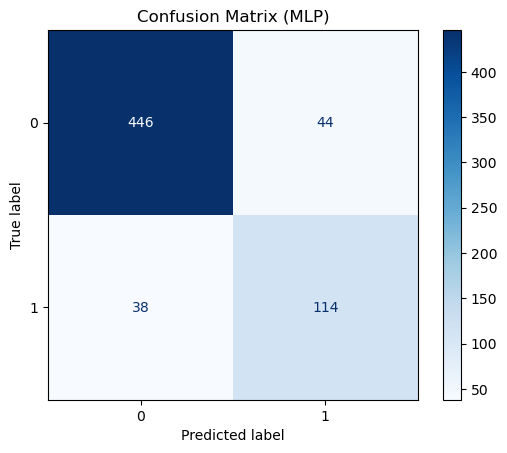

Text(0.5, 1.0, 'ROC Curve (MLP)')

In [27]:
# 'hidden_layer_sizes': 1000, 'activation': 'tanh', 'learning_rate_init': 0.012209290399421438, 'max_iter': 656
mlp = MLPClassifier(random_state=42, hidden_layer_sizes=(1000,), activation='tanh', learning_rate_init=0.012209290399421438, max_iter=656)
# mlp = MLPClassifier(random_state=42, hidden_layer_sizes=(1000,), activation='relu')
mlp.fit(X_train_scaled_std_scaler, y_train_balanced)

mlp_pred = mlp.predict(X_test_scaled_std_scaler)
mlp_accuracy = metrics.accuracy_score(y_test, mlp_pred)
mlp_precision = metrics.precision_score(y_test, mlp_pred)
mlp_recall = metrics.recall_score(y_test, mlp_pred)

mlp_f1_score = metrics.f1_score(y_test, mlp_pred)

mlp_cm = metrics.confusion_matrix(y_test, mlp_pred)

print(f'Accuracy: {mlp_accuracy}')
print(f'Precision: {mlp_precision}')
print(f'Recall: {mlp_recall}')
print(f'F1 Score: {mlp_f1_score}')

disp = ConfusionMatrixDisplay(confusion_matrix=mlp_cm, display_labels=np.unique(y_test))
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix (MLP)')
plt.show()

RocCurveDisplay.from_estimator(mlp, X_test_scaled_std_scaler, y_test)
plt.title('ROC Curve (MLP)')

In [16]:
#tune with optuna
import optuna
from sklearn.neural_network import MLPClassifier

def objective(trial):
        hidden_layer_sizes = trial.suggest_categorical('hidden_layer_sizes', [50, 100, 200, 500, 1000])
        activation = trial.suggest_categorical('activation', ['relu', 'tanh', 'logistic'])
        learning_rate_init = trial.suggest_float('learning_rate_init', 1e-5, 1e-1)  # Log scale for learning rate
        max_iter = trial.suggest_int('max_iter', 200, 1000)  # Number of iterations

        mlp = MLPClassifier(random_state=42, 
                        hidden_layer_sizes=hidden_layer_sizes, 
                        activation=activation,
                        learning_rate_init=learning_rate_init,
                        max_iter=max_iter)
        mlp.fit(X_train_scaled_n_scaler, y_train_balanced)
        mlp_pred = mlp.predict(X_test_scaled_n_scaler)
        mlp_accuracy = metrics.accuracy_score(y_test, mlp_pred)

        return mlp_accuracy

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)



[I 2024-11-27 00:42:19,994] A new study created in memory with name: no-name-bef80f9f-227a-430f-8ef2-a0f1f4b7c798
[I 2024-11-27 00:42:22,729] Trial 0 finished with value: 0.8894080996884736 and parameters: {'hidden_layer_sizes': 200, 'activation': 'relu', 'learning_rate_init': 0.0187787204767779, 'max_iter': 550}. Best is trial 0 with value: 0.8894080996884736.
[I 2024-11-27 00:42:26,102] Trial 1 finished with value: 0.8629283489096573 and parameters: {'hidden_layer_sizes': 100, 'activation': 'tanh', 'learning_rate_init': 0.06828102246202926, 'max_iter': 563}. Best is trial 0 with value: 0.8894080996884736.
[I 2024-11-27 00:42:28,351] Trial 2 finished with value: 0.8722741433021807 and parameters: {'hidden_layer_sizes': 50, 'activation': 'relu', 'learning_rate_init': 0.026551533297414547, 'max_iter': 492}. Best is trial 0 with value: 0.8894080996884736.
[I 2024-11-27 00:42:33,054] Trial 3 finished with value: 0.8878504672897196 and parameters: {'hidden_layer_sizes': 100, 'activation': 

c:\Users\bwelo\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.8722741433021807
Precision: 0.7215189873417721
Recall: 0.75
F1 Score: 0.7354838709677419


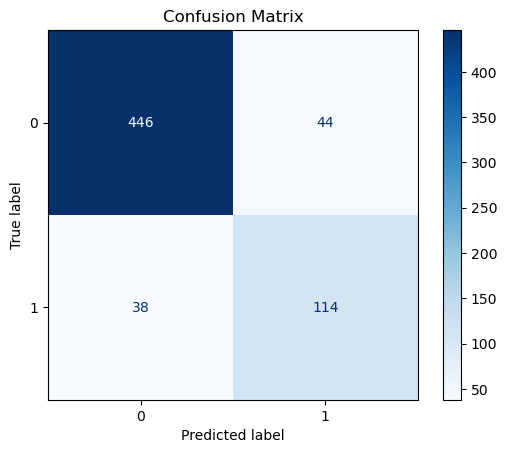

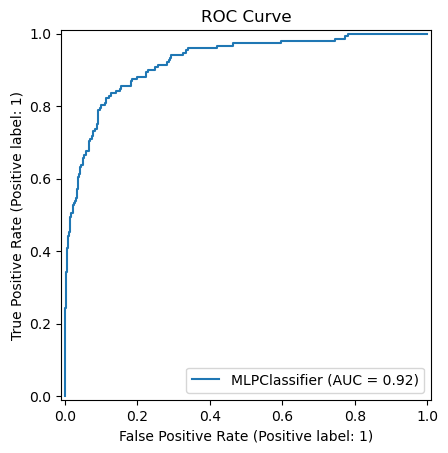

In [ ]:
# 'hidden_layer_sizes': 1000, 'activation': 'tanh', 'learning_rate_init': 0.012209290399421438, 'max_iter': 656
# mlp = MLPClassifier(random_state=42, hidden_layer_sizes=(1000,), activation='tanh', learning_rate_init=0.012209290399421438, max_iter=656)
mlp.fit(X_train_scaled_std_scaler, y_train_balanced)

mlp_pred_final = mlp.predict(X_test_scaled_std_scaler)
mlp_accuracy_final = metrics.accuracy_score(y_test, mlp_pred)
mlp_precision_final = metrics.precision_score(y_test, mlp_pred)
mlp_recall_final = metrics.recall_score(y_test, mlp_pred)
mlp_f1_score_final = metrics.f1_score(y_test, mlp_pred)
mlp_cm = metrics.confusion_matrix(y_test, mlp_pred)

print_scores(mlp, X_test_scaled_std_scaler, mlp_accuracy_final, mlp_precision_final, mlp_recall_final, mlp_f1_score_final, mlp_cm)

Final Results: MLP
Accuracy: 0.8769470404984424 -> 0.8722741433021807
Precision: 0.7588652482269503 -> 0.7215189873417721
Recall: 0.7039473684210527 -> 0.75
F1 Score: 0.7303754266211604 -> 0.7354838709677419


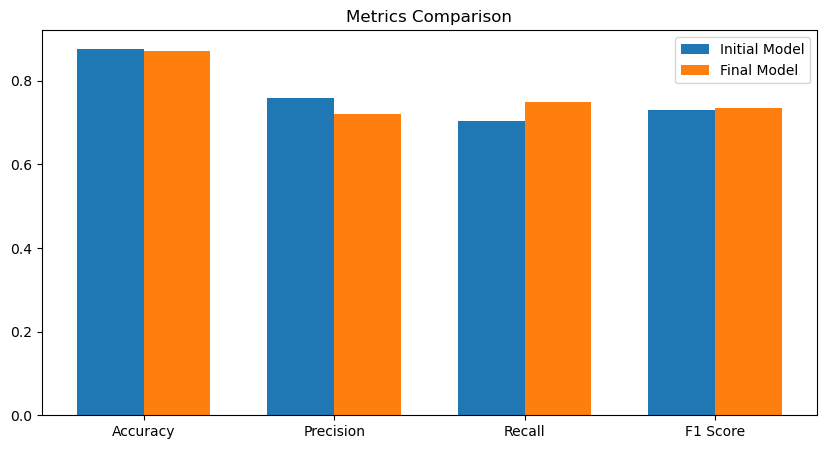

In [30]:
#compare the initial and final results

print(f'Final Results: MLP')
print(f'Accuracy: {mlp_accuracy_initial} -> {mlp_accuracy_final}')
print(f'Precision: {mlp_precision_initial} -> {mlp_precision_final}')
print(f'Recall: {mlp_recall_initial} -> {mlp_recall_final}')
print(f'F1 Score: {mlp_f1_score_initial} -> {mlp_f1_score_final}')

#plot metrics on same graph
fig, ax = plt.subplots(figsize=(10, 5))

metrics_list = [mlp_accuracy_initial, mlp_precision_initial, mlp_recall_initial, mlp_f1_score_initial]
metrics_list_final = [mlp_accuracy_final, mlp_precision_final, mlp_recall_final, mlp_f1_score]
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

x = np.arange(len(metrics_list))
bar_width = 0.35

ax.bar(x, metrics_list, bar_width, label='Initial Model')
ax.bar(x + bar_width, metrics_list_final, bar_width, label='Final Model')

ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(metrics_names)
ax.set_title('Metrics Comparison')
ax.legend()

plt.show()


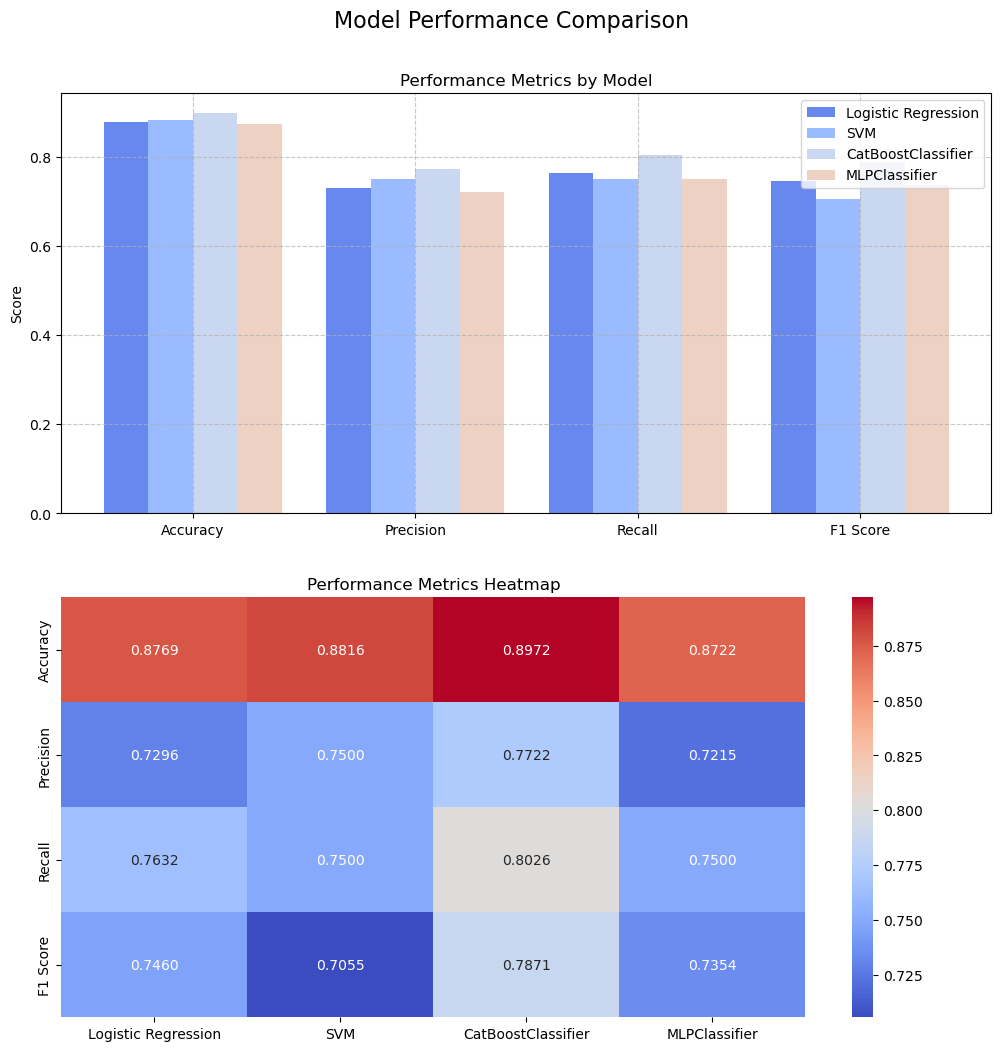

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

models = ['Logistic Regression', 'SVM', 'CatBoostClassifier', 'MLPClassifier']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

data = np.array([
    [0.8769, 0.8816, 0.8972, 0.8722],  # Accuracy
    [0.7296, 0.7500, 0.7722, 0.7215],  # Precision
    [0.7632, 0.7500, 0.8026, 0.7500],  # Recall
    [0.7460, 0.7055, 0.7871, 0.7354]   # F1 Score
])

sns.set_palette("coolwarm")

fig, axes = plt.subplots(2, 1, figsize=(12, 12))
fig.suptitle('Model Performance Comparison', fontsize=16, y=0.95)

bar_width = 0.2
x = np.arange(len(metrics))

for i, model in enumerate(models):
    axes[0].bar(x + i*bar_width, data[:, i], bar_width, label=model)

axes[0].set_ylabel('Score')
axes[0].set_title('Performance Metrics by Model')
axes[0].set_xticks(x + bar_width * 1.5)
axes[0].set_xticklabels(metrics)
axes[0].legend()
axes[0].grid(True, linestyle='--', alpha=0.7)

sns.heatmap(data, annot=True, cmap='coolwarm', fmt='.4f',
            xticklabels=models,
            yticklabels=metrics,
            ax=axes[1])
axes[1].set_title('Performance Metrics Heatmap')

# Adjust layout
# plt.tight_layout()

plt.show()